<ipython-input-1-c9117711bd7d>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  vars_df = vars_df.resample("D").mean().fillna(method='ffill')


                 Open       High        Low      Close        Volume
2023-05-06  -9.862460  -8.675250  -9.509092  -7.462922  1.108337e+06
2023-05-07 -35.680848 -35.016615 -34.658367 -36.031822 -2.888836e+06
2023-05-08 -20.367596 -22.395157 -22.073895 -25.337504 -8.789253e+06
2023-05-09  31.985762  30.836769  31.674703  31.726245 -1.356916e+05
2023-05-10  48.193757  48.112513  47.261216  48.208243  2.019245e+06
2023-05-11  21.547169  21.132057  21.862787  22.205527  2.046942e+06
2023-05-12 -21.052030 -19.118223 -19.754823 -19.460380  1.869485e+06


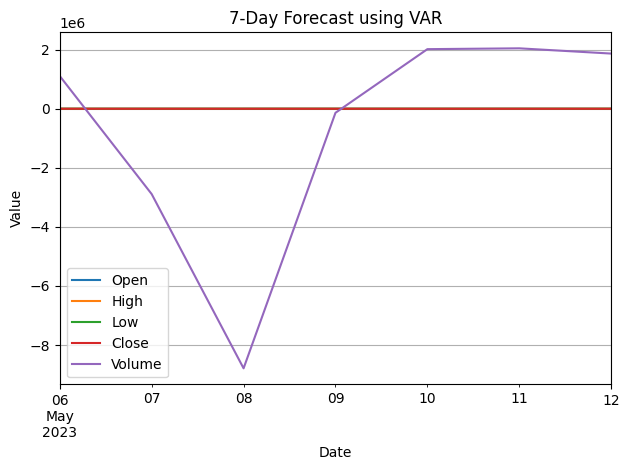

In [1]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Select variables for VAR
vars_df = df[["Open", "High", "Low", "Close", "Volume"]]

# Resample to daily frequency and handle duplicates by taking the mean
# This ensures there's only one value per day
vars_df = vars_df.resample("D").mean().fillna(method='ffill')

# Differencing for stationarity
data_diff = vars_df.diff().dropna()

# **Adjust maxlags to be smaller**
# Calculate a suitable maxlags value based on data size and the number of variables
# A common rule of thumb is to use the square root of the number of observations
# but adjust downwards if necessary to avoid the error.
# For example, if you have 100 observations and 5 variables,
# you could try maxlags = 5 or lower.
maxlags_value = min(10, int(len(data_diff)**0.5) - 1) # Example: Adjust as needed

# Fit VAR
model = VAR(data_diff)
results = model.fit(maxlags=maxlags_value, ic='aic') # Use the adjusted maxlags value

# Forecast 7 steps ahead
forecast = results.forecast(data_diff.values[-results.k_ar:], steps=7)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=vars_df.index[-1] + pd.Timedelta(days=1), periods=7),
                           columns=vars_df.columns)

print(forecast_df)

# Plot
forecast_df.plot(title='7-Day Forecast using VAR')
plt.ylabel('Value')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()